# Audio Augmentation

In [1]:
import librosa
import librosa.display
import augly.audio as audaugs
import IPython.display as ipd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

SR = 44100

def save_fig(X, sr, output_path):
    plt.figure()
    p = librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz')
    plt.savefig(output_path)
    plt.close()

In [2]:
audio_path = "./input/original_audio.wav"
ipd.Audio(audio_path)

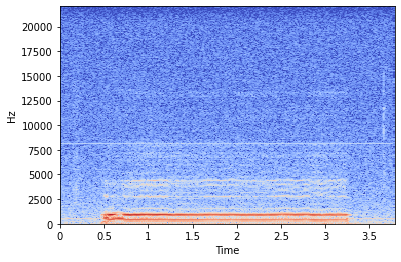

In [3]:
x, sr = librosa.load(audio_path, sr=SR)
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
p = librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/original.png")

## Add Background Noise

In [4]:
metadata = []
aug_audio, sr = audaugs.add_background_noise(audio_path, sample_rate=SR, metadata=metadata)
print(metadata)
ipd.Audio(aug_audio, rate=sr)

[{'name': 'add_background_noise', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'background_audio': None, 'snr_level_db': 10.0, 'output_path': None, 'background_duration': 3.7738548752834467, 'intensity': 90.9090909090909}]


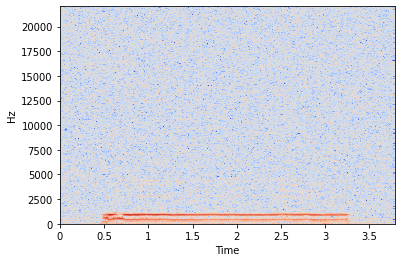

In [5]:
X = librosa.stft(aug_audio)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/bgnoise.png")

## Low Pass Filter

In [6]:
metadata = []
aug_audio, sr = audaugs.low_pass_filter(audio_path, sample_rate=SR, cutoff_hz=5000, metadata=metadata)
print(metadata)
ipd.Audio(aug_audio, rate=sr)

[{'name': 'low_pass_filter', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'alpha': 0.4160172294378693, 'cutoff_hz': 5000, 'output_path': None, 'intensity': 75.0}]


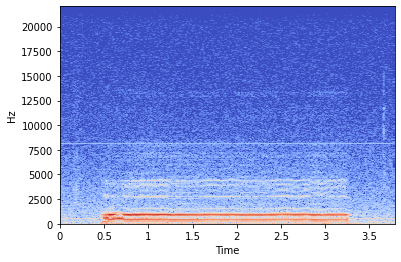

In [7]:
X = librosa.stft(aug_audio)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/lowpass.png")

## Extracts the Percussive

In [8]:
metadata = []
aug_audio, sr = audaugs.percussive(audio_path, sample_rate=SR, metadata=metadata)
print(metadata)
ipd.Audio(aug_audio, rate=sr)

[{'name': 'percussive', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'output_path': None, 'kernel_size': 31, 'margin': 1.0, 'power': 2.0, 'intensity': 100.0}]


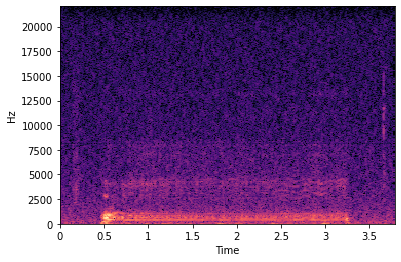

In [9]:
X = librosa.stft(aug_audio)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/percussive.png")

## Pitch Shift

In [10]:
metadata = []
aug_audio, sr = audaugs.pitch_shift(audio_path, sample_rate=SR, n_steps=10, metadata=metadata)
print(metadata)
ipd.Audio(aug_audio, rate=sr)

[{'name': 'pitch_shift', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'output_path': None, 'n_steps': 10, 'intensity': 11.904761904761903}]


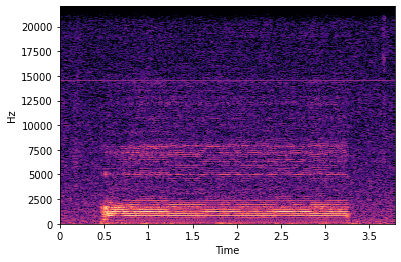

In [11]:
X = librosa.stft(aug_audio)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/pitchshift.png")

## Components

In [12]:
TRANSFORMS = audaugs.Compose([
    audaugs.AddBackgroundNoise(),
    audaugs.ChangeVolume(volume_db=10.0, p=0.5),
    audaugs.OneOf(
        [audaugs.LowPassFilter(cutoff_hz=3000), audaugs.PitchShift(n_steps=10)]
    ),
])

metadata = []

# aug_audio is a NumPy array with your augmentations applied!
audio_array, _ = librosa.load(audio_path, sr=SR)
aug_audio, _ = TRANSFORMS(audio_array, SR, metadata=metadata)
print(metadata)
ipd.Audio(aug_audio, rate=SR)

[{'name': 'add_background_noise', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'background_audio': None, 'snr_level_db': 10.0, 'output_path': None, 'background_duration': 3.7738548752834467, 'intensity': 90.9090909090909}, {'name': 'change_volume', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channels': 1, 'src_sample_rate': 44100, 'dst_sample_rate': 44100, 'src_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'dst_segments': [{'start': 0.0, 'end': 3.7738548752834467}], 'volume_db': 10.0, 'output_path': None, 'intensity': 9.090909090909092}, {'name': 'low_pass_filter', 'src_duration': 3.7738548752834467, 'dst_duration': 3.7738548752834467, 'src_num_channels': 1, 'dst_num_channel

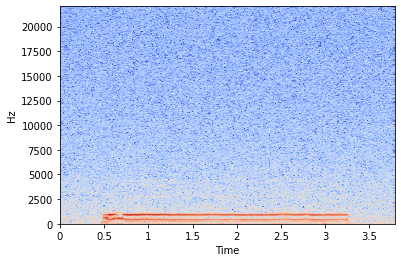

In [13]:
X = librosa.stft(aug_audio)
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=SR, x_axis='time', y_axis='hz')

save_fig(Xdb, SR, "./output/audio/components.png")